In [9]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt import BayesSearchCV
import pickle



In [14]:
cleaned_df=pd.read_csv('../../../../training_data/variance_cleanup_features_corrected/variance_cleanup_selected_features_corrected.csv')
cleaned_df.set_index('url',inplace=True)

In [15]:
cleaned_df

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,0,...,0.0,0.0,0,0,0,1,0,0,4,1.0
https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,0,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,0,...,0.0,0.0,0,0,0,1,0,0,3,1.0
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,1,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,0,...,0.0,0.0,0,0,0,0,0,0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,1,0,0,18,1,0,1,2,0,0,...,0.0,0.0,0,0,0,1,0,0,0,0.0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,1,...,0.0,0.0,0,0,0,0,0,0,0,0.0
https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [23]:
selected_features=pd.read_csv('../../../hyperparameter_tuning/svm/svm_selected_test_features.csv')
selected_features.set_index('url',inplace=True)

In [24]:
selected_features

,https_true,url_hyphen_count,url_www_count,url_https_count,hostname_lenght,hostname_hyphen_count,hostname_digits_count,file_lenght,file_hyphen_count,html_hl_ratio_int,html_hl_ratio_ext,html_hl_ratio_null,html_hl_ratio_a_int,html_hl_ratio_a_ext,html_hl_ratio_a_null,html_hl_ratio_src_other_ext,html_hl_external_css,html_unsafe_anchor,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,
http://20191018t003709-dot-wetransfer-auth-file7782.appspot.com/,0,4,0,0,56,4,18,0,0,0.000000,0.928571,0.071429,0.000000,0.000000,1.000000,1.000000,1.0,1,4,0.0
https://accounts.google.com/ServiceLogin?passive=1209600&osid=1&continue=https://plus.google.com/%2Bsouthernsavers&followup=https://plus.google.com/%2Bsouthernsavers,1,0,0,3,19,0,0,12,0,0.888889,0.111111,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0,10,0.0
https://jimwarholic.com/2007/05/forcing-comcast-to-new-ip-address-with.php,1,6,0,1,15,0,0,42,6,0.550562,0.449438,0.000000,0.480769,0.519231,0.000000,0.500000,1.0,1,3,1.0
https://www.easycalculation.com/analytical/perpendicular-bisector-line.php,1,2,1,1,23,0,0,31,2,0.911392,0.075949,0.012658,0.963636,0.018182,0.018182,0.625000,0.0,1,4,1.0
https://onlinkaoiuvrnow.com/mtbonline2020/redirect.html,1,0,0,1,19,0,0,13,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://en.wikipedia.org/wiki/Timeline_of_Amazon_Web_Services,1,0,0,1,16,0,0,31,0,0.802678,0.197322,0.000000,0.762281,0.237719,0.000000,0.000000,0.0,1,6,1.0
https://mail-w3redelivery.com/royalmail/secure.php?&amp;sessionid=$hash&amp;securessl=true,1,1,0,1,21,1,1,10,0,0.516129,0.451613,0.032258,0.350000,0.650000,0.000000,0.000000,0.0,1,0,0.0
http://najibafaiz.art/updsadtezi/Home/First-page/,0,1,0,0,14,0,0,0,0,0.956811,0.000000,0.043189,0.938389,0.000000,0.061611,0.000000,0.0,1,0,0.0


In [25]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [26]:
features=features[selected_features.columns]

In [27]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

[LibSVM]Accuracy: 0.9421666666666667
Recall: 0.9547435467650017


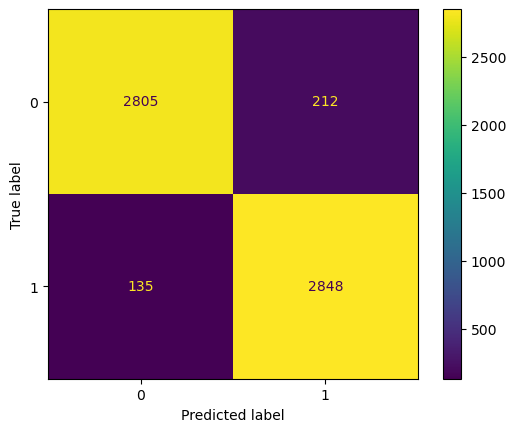

In [35]:
clf = svm.SVC(verbose=True)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../../images/after_validation/svm/svm_confusion_matrix_before_tuning',dpi=300, bbox_inches = "tight")

In [36]:
params = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    #'degree': Integer(1,8),
    'kernel': Categorical(['linear', 'sigmoid', 'rbf']),
}

In [37]:
opt = BayesSearchCV(
    svm.SVC(),
    search_spaces=params,
    cv=4,
    scoring='accuracy',
    #random_state=42,
    n_iter=20,
    verbose=1,
)
np.int = int

In [38]:
opt.fit(X_train_selected,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

BayesSearchCV(cv=4, estimator=SVC(), n_iter=20, scoring='accuracy',
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=10.0, prior='log-uniform', transform='normalize'),
                             'kernel': Categorical(categories=('linear', 'sigmoid', 'rbf'), prior=None)},
              verbose=1)

In [39]:
print(opt.best_score_)
print(opt.best_params_)

0.9466428571428571
OrderedDict([('C', 407716.0913552751), ('gamma', 2.281963461381894e-06), ('kernel', 'rbf')])


[LibSVM]Accuracy: 0.9518333333333333
Recall: 0.9591015755950385


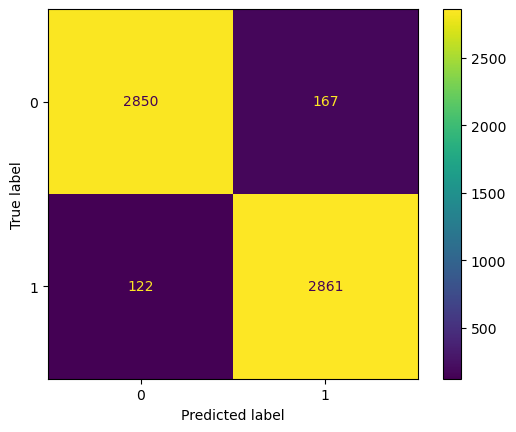

In [42]:
clf = svm.SVC(C=407716.0913552751,gamma=2.281963461381894e-06,kernel='rbf',verbose=True)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../../images/after_validation/svm/svm_confusion_matrix_after_tuning',dpi=300, bbox_inches = "tight")
#displ.plot().sa('../../../images/hyperparameter_tuning/svm/SVM_confusion_matrix_before_tuning',dpi=300, bbox_inches = "tight")
#plt.savefig('../../../images/hyperparameter_tuning/svm/svm_confusion_matrix_after_tuning',dpi=300, bbox_inches = "tight")

[LibSVM]Accuracy: 0.9611666666666666
Recall: 0.9668119342943345


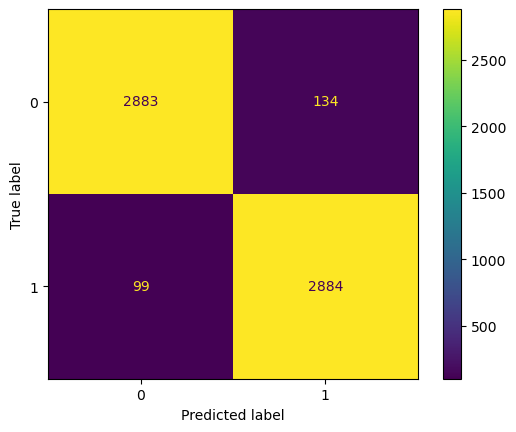

In [43]:
clf = svm.SVC(C=251154.72543937177,gamma=0.00012714941185967683,kernel='rbf',verbose=True)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../../images/after_validation/svm/svm_confusion_matrix_after_tuning_old_parameter',dpi=300, bbox_inches = "tight")

In [48]:
pickle.dump(clf, open('../../saved_models/svm/svm_model_tuned.pkl', 'wb'))